In [19]:
import pprint as pp
import requests 
import eventregistry
import json
from newsapi import NewsApiClient
from datetime import date
import datetime
import pandas as pd
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime, timedelta
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize.regexp import WhitespaceTokenizer
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob



[nltk_data] Downloading package punkt to /Users/hsaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hsaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [698]:
from eventregistry import *
er = EventRegistry(apiKey = '33bbd245-d081-4083-aea8-aae044547b59' )
q = QueryArticles(
    dateStart = datetime.date(2020, 1, 1), dateEnd = datetime.date(2020, 1, 5),
    conceptUri = er.getConceptUri("Coronavirus"),
    sourceUri = er.getNewsSourceUri("The Wall Street Journal"))

# return details about the articles, including the concepts, categories, location and image
q.setRequestedResult(RequestArticlesInfo(count = 25,
    sortBy = "socialScore",
    returnInfo = ReturnInfo(
        articleInfo = ArticleInfoFlags(socialScore= True, duplicateList = True, concepts = True, categories = True, location = True, image = True))))
# execute the query
Jan_weekzero_WSJ = er.execQuery(q)


using user provided API key for making requests
Event Registry host: http://eventregistry.org
Text analytics host: http://analytics.eventregistry.org


In [699]:
Jan_weekzero_WSJ

{'articles': {'results': [],
  'totalResults': 0,
  'page': 1,
  'count': 0,
  'pages': 1},
 'info': 'No results match the search conditions.'}

In [308]:
import pickle

In [309]:
with open('March_weektwo_WSJ','wb') as file:
    pickle.dump(March_weektwo_WSJ, file)

In [706]:
with open('March_weektwo_Guard_WSJ', 'w') as json_file:
    json.dump(March_weektwo_WSJ, json_file)

In [16]:
all_articles = res['articles']['results']

In [18]:
structure_JSON = []
for id, article in enumerate(all_articles):
    structure_JSON.append({"id": id, "body": article['body'], "date": [date]})

In [4]:
res["articles"].keys()

dict_keys(['results', 'totalResults', 'page', 'count', 'pages'])

In [5]:
pd.DataFrame(res["articles"]["results"])

,uri,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,url,...,authors,concepts,categories,image,eventUri,location,shares,sentiment,wgt,relevance
0,6025046583,eng,False,2020-04-08,15:38:00,2020-04-08T15:38:00Z,2020-04-08T15:37:00Z,news,0.654902,https://www.nytimes.com/2020/04/08/us/politics...,...,"[{'uri': 'sydney_ember@nytimes.com', 'name': '...","[{'uri': 'http://en.wikipedia.org/wiki/.mr', '...","[{'uri': 'dmoz/Society/Politics', 'label': 'dm...",https://static01.nyt.com/images/2020/03/10/us/...,eng-5660823,None,"{'facebook': 282361, 'pinterest': 16}",0.011765,282377,52
1,6024217077,eng,False,2020-04-08,01:49:00,2020-04-08T01:49:00Z,2020-04-08T01:49:00Z,news,0.788235,https://www.nytimes.com/2020/04/07/arts/music/...,...,"[{'uri': 'william_grimes@nytimes.com', 'name':...",[{'uri': 'http://en.wikipedia.org/wiki/John_Pr...,"[{'uri': 'dmoz/Arts/Music', 'label': 'dmoz/Art...",https://static01.nyt.com/images/2018/10/22/opi...,eng-5668881,None,"{'facebook': 68964, 'pinterest': 28}",-0.137255,68992,76
2,6028708057,eng,False,2020-04-11,16:27:00,2020-04-11T16:27:00Z,2020-04-11T16:27:00Z,news,0.901961,https://www.nytimes.com/2020/04/11/us/politics...,...,"[{'uri': 'eric_lipton@nytimes.com', 'name': 'E...",[{'uri': 'http://en.wikipedia.org/wiki/Social_...,"[{'uri': 'dmoz/Society/Issues', 'label': 'dmoz...",https://static01.nyt.com/images/2020/04/12/us/...,eng-5681986,None,"{'facebook': 41258, 'pinterest': 113}",-0.003922,41371,101
3,6026797611,eng,False,2020-04-09,23:29:00,2020-04-09T23:29:00Z,2020-04-09T23:28:00Z,news,0.890196,https://www.nytimes.com/2020/04/09/opinion/wis...,...,"[{'uri': 'paul_krugman@nytimes.com', 'name': '...",[{'uri': 'http://en.wikipedia.org/wiki/Democra...,"[{'uri': 'dmoz/Society/Politics', 'label': 'dm...",https://static01.nyt.com/images/2020/04/09/opi...,eng-5679062,None,"{'facebook': 40844, 'pinterest': 42}",-0.152941,40886,76
4,6027227256,eng,False,2020-04-10,09:07:00,2020-04-10T09:07:00Z,2020-04-10T09:04:00Z,news,0.000000,https://www.nytimes.com/2020/04/10/us/coronavi...,...,[],[{'uri': 'http://en.wikipedia.org/wiki/Coronav...,"[{'uri': 'dmoz/Health', 'label': 'dmoz/Health'...",https://www.nytimes.com/newsgraphics/2020/03/0...,None,None,"{'facebook': 37502, 'pinterest': 14}",-0.372549,37516,101
5,6025472960,eng,False,2020-04-08,23:04:00,2020-04-08T23:04:00Z,2020-04-08T23:04:00Z,news,0.000000,https://www.nytimes.com/2020/04/08/nyregion/co...,...,"[{'uri': 'danny_hakim@nytimes.com', 'name': 'D...",[{'uri': 'http://en.wikipedia.org/wiki/Coronav...,"[{'uri': 'dmoz/Society/Disabled', 'label': 'dm...",https://static01.nyt.com/images/2020/04/08/us/...,None,None,"{'facebook': 34991, 'pinterest': 8}",0.098039,34999,101
6,6025590620,eng,False,2020-04-09,01:58:00,2020-04-09T01:58:00Z,2020-04-09T01:57:00Z,news,0.000000,https://www.nytimes.com/2020/04/08/science/new...,...,"[{'uri': 'carl_zimmer@nytimes.com', 'name': 'C...",[{'uri': 'http://en.wikipedia.org/wiki/Coronav...,[{'uri': 'dmoz/Health/Conditions_and_Diseases/...,https://static01.nyt.com/images/2020/04/09/sci...,None,None,"{'facebook': 34344, 'pinterest': 44}",-0.082353,34388,101
7,6028701635,eng,False,2020-04-11,16:19:00,2020-04-11T16:19:00Z,2020-04-11T16:19:00Z,news,0.709804,https://www.nytimes.com/2020/04/11/world/europ...,...,"[{'uri': 'maria_varenikova@nytimes.com', 'name...",[{'uri': 'http://en.wikipedia.org/wiki/Chernob...,[{'uri': 'dmoz/Health/Public_Health_and_Safety...,https://static01.nyt.com/images/2020/04/12/wor...,eng-5679803,"{'type': 'country', 'label': {'eng': 'Ukraine'}}","{'facebook': 32595, 'pinterest': 7}",-0.090196,32602,27
8,6026753671,eng,False,2020-04-09,22:41:00,2020-04-09T22:41:00Z,2020-04-09T22:20:00Z,news,0.701961,https://www.nytimes.com/2020/04/09/us/politics...,...,"[{'uri': 'elizabeth_williamson@nytimes.com', '...",[{'uri': 'http://en.wikipedia.org/wiki/Social_...,"[{'uri': 'dmoz/Health', 'label': 'dmoz/Health'...",https://static01.nyt.com/images/2020/04/08/us/...,eng-5674352,"{'type': 'place', 'label': {'eng': 'Suga

In [700]:
key_words_list=[]
for data in March_weekfour_NYT['articles']['results']:
    art = Article(url=data['url'])
    art.download()
    art.parse()
    art.nlp()
    key_words_list.append(art.keywords)


In [701]:
flat_list = [item for sublist in key_words_list for item in sublist]

In [702]:
STOPWORDS.add('coronavirus ')
STOPWORDS.add(' coronavirus')
STOPWORDS.add('corona')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus ')
STOPWORDS.add(' coronavirus ')
STOPWORDS.add('Corona')
STOPWORDS.add('covid19')
STOPWORDS.add('COVID19')
STOPWORDS.add('virus')


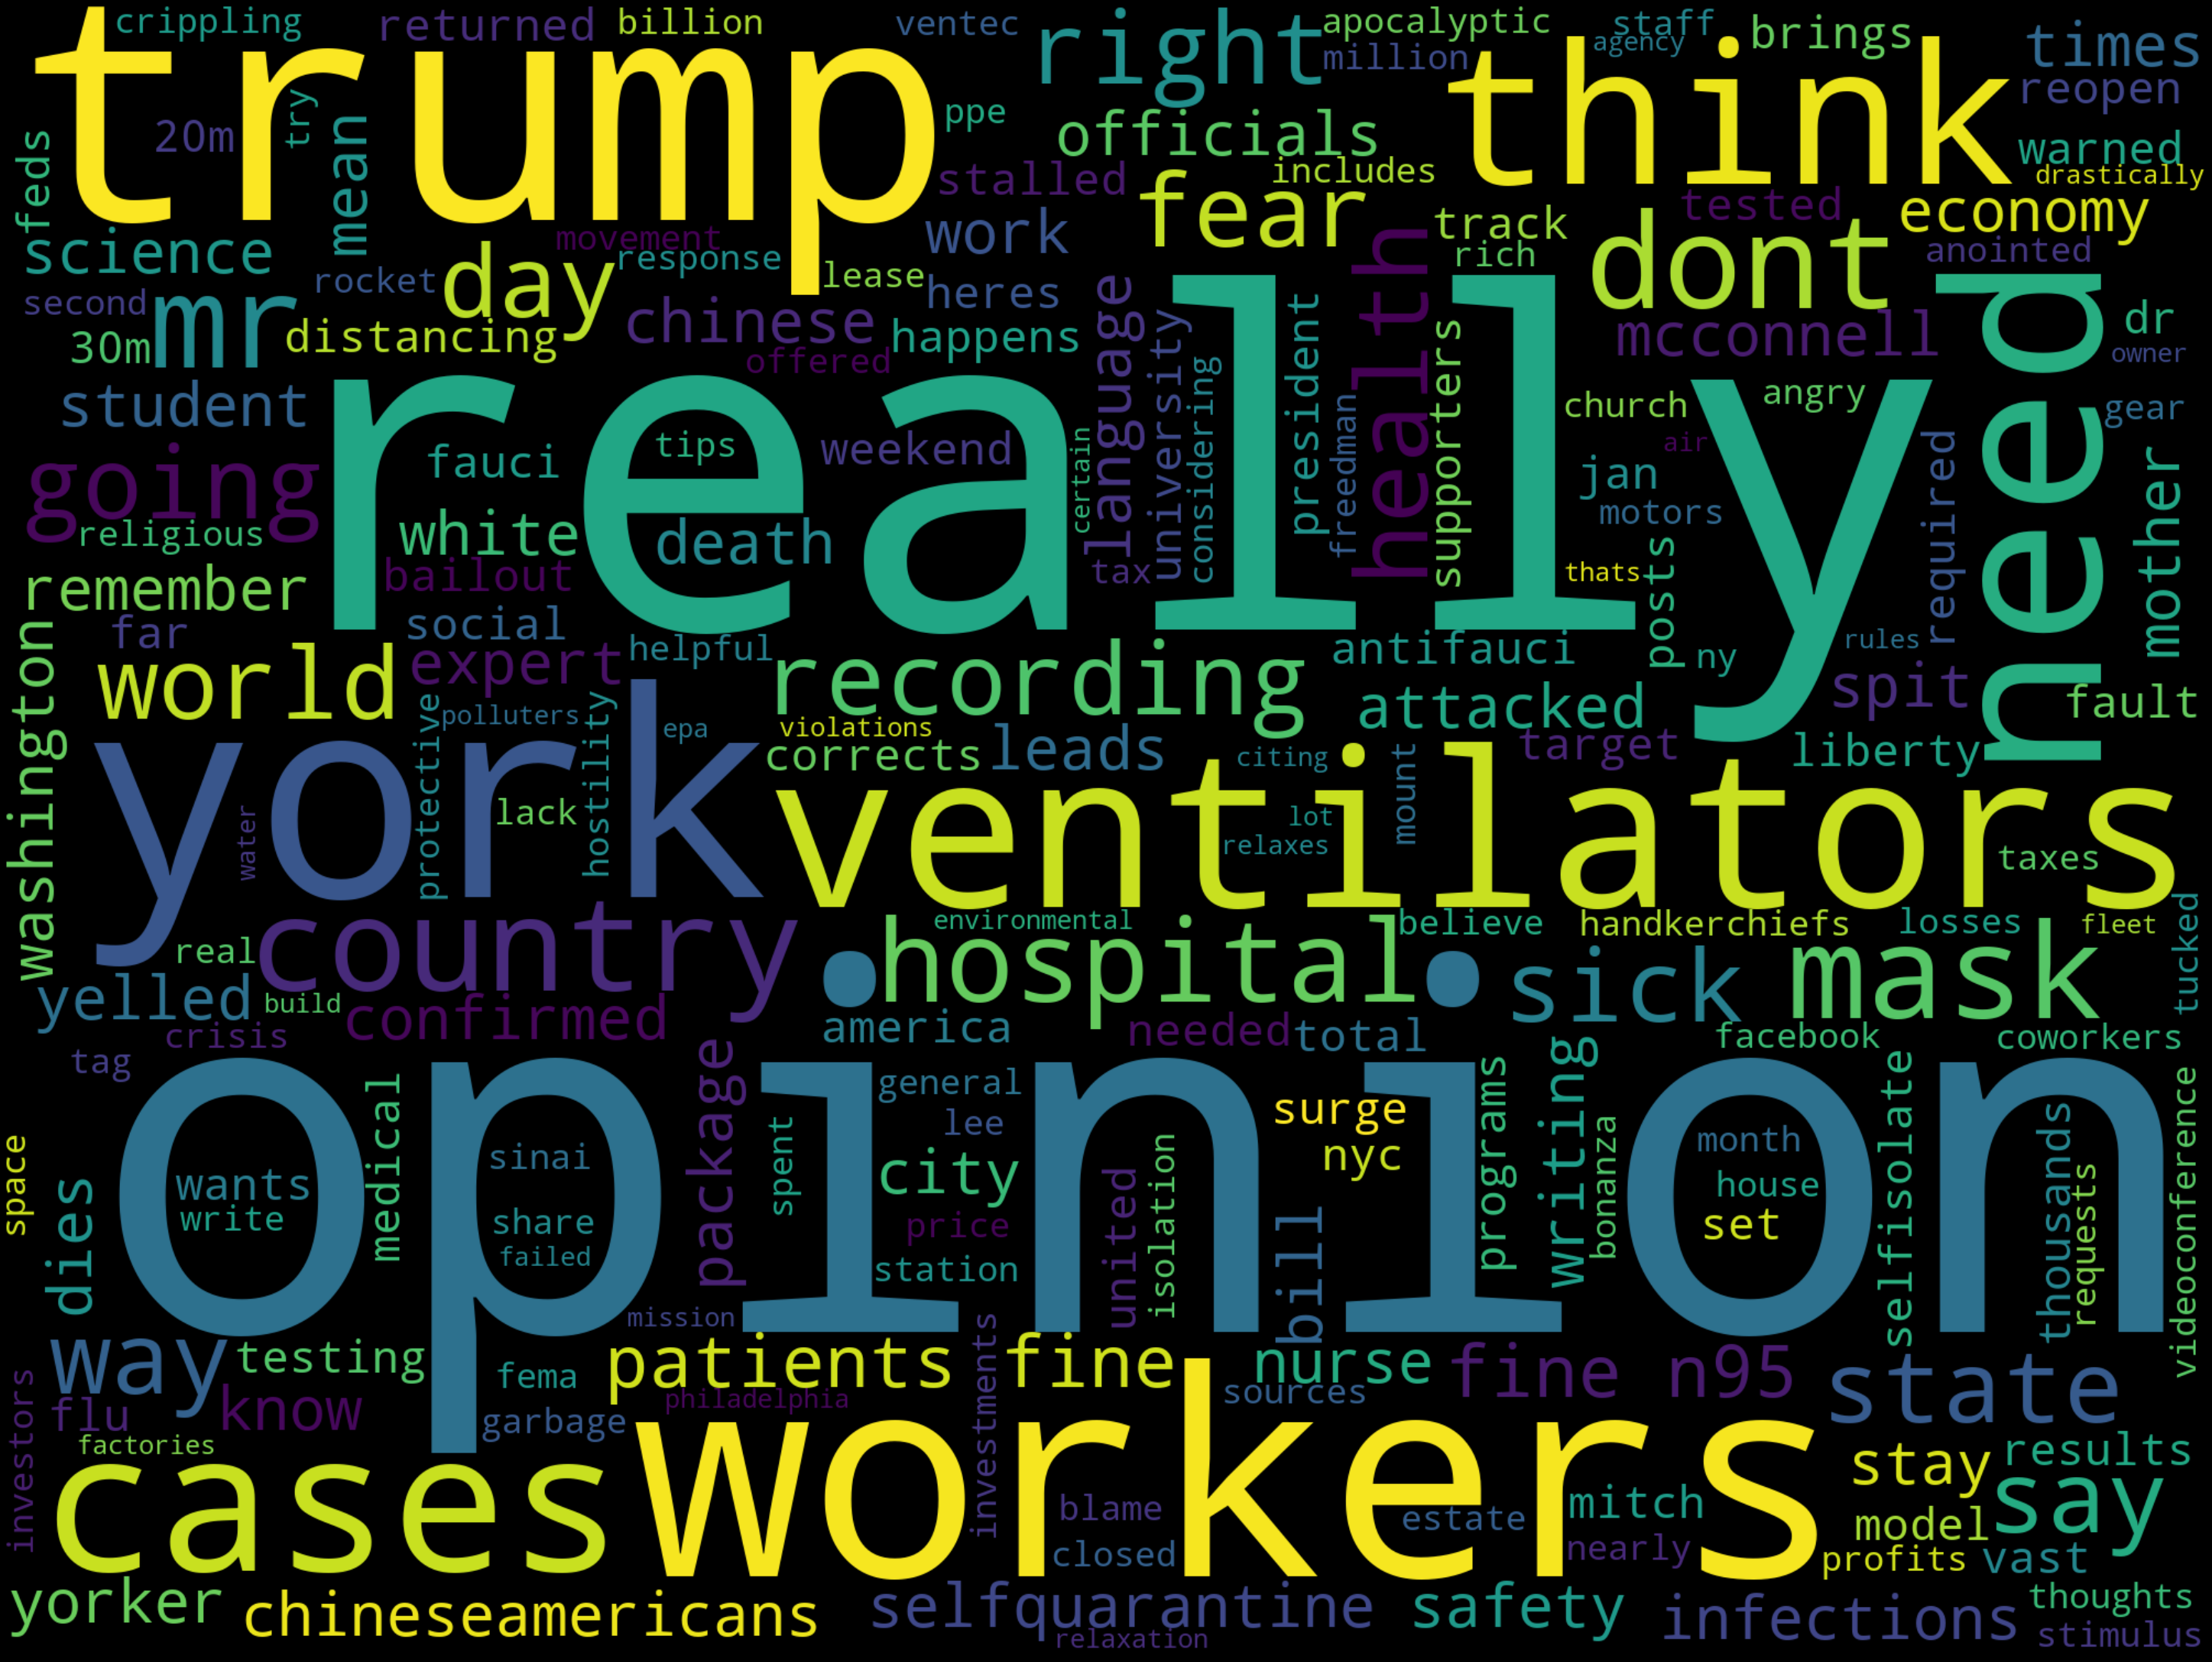

In [703]:
text = " ".join(flat_list)
wordcloud = WordCloud(
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [704]:
key_words_list



[['chineseamericans',
  'chinese',
  'recording',
  'remember',
  'language',
  'say',
  'safety',
  'fear',
  'attacked',
  'spit',
  'yelled',
  'mother',
  'really',
  'way',
  'think',
  'mean'],
 ['20m',
  'trump',
  'social',
  'reopen',
  'distancing',
  'model',
  'total',
  '14',
  'wants',
  'opinion',
  'infections',
  'flu',
  '30m',
  'america',
  'heres',
  'jan',
  'happens'],
 ['united',
  'track',
  'states',
  'cases',
  'world',
  'warned',
  'vast',
  'country',
  'leads',
  'confirmed',
  'virus',
  'coronavirus',
  'worlds',
  'york'],
 ['right',
  'supporters',
  'medical',
  'thousands',
  'mr',
  'target',
  'trump',
  'expert',
  'times',
  'posts',
  'president',
  'antifauci',
  'dr',
  'corrects',
  'fauci',
  'far'],
 ['brings',
  'selfisolate',
  'liberty',
  'selfquarantine',
  'required',
  'returned',
  'fears',
  'students',
  'coronavirus',
  'university',
  'student',
  'testing',
  'tested',
  'results'],
 ['chineseamericans',
  'chinese',
  'recor

In [ ]:
STOPWORDS.add('coronavirus ')
STOPWORDS.add(' coronavirus')
STOPWORDS.add('corona')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus ')
STOPWORDS.add(' coronavirus ')
STOPWORDS.add('Corona')
STOPWORDS.add('covid19')
STOPWORDS.add('COVID19')
STOPWORDS.add('virus')


In [ ]:
text_100=[]
for abc_articles in all_articles['articles']:
    
    

In [ ]:
abc1=all_articles['articles'][10]
art = Article(url=abc1['url'])
art.download()
print(art.text)